![example](images/logo.png)

# Microsoft Movie Studio Films Analysis

**Author:** Nyaoke Brian Antony
* Student pace: Full time
* Scheduled project review date/time: 08/22/2022
* Instructor name: Antony Muiko 
* Blog post URL:

## Overview
This projects analyze the movies datasets from two main online movies databases [IMDB](ww.imdb.com) and [BOX OFFICE](ww.boxofficemojo.com) which contain information about different genres of movies.<br>
The growing demand for video content creation shows a trend in increased adoption of certain movie types while other videos seem to perform poorly resulting to losses suffered by the production companies.
<p>
The datasets are intended to provide a data driven desicon on which type of movies the new Micrsosft Studio should produce to take advantage of the growing video content creation and avoid losses by producing videos that are mostly liked by many since high traffic on a perticuler film has a positive correlation with sales hence high profit margins.


## Business Problem

These two datasets can be able to give us clues on which types of films have high demand to enable the Microsoft Studio team to focus only on a small genre of films with high returns.<br>
We can also get a pictur of how different factors such as duration, languages and ratings influence the type of film to produce.<br>
These quetions are important since they have a direct effect on the success of the new Microssoft Studio since low sales and poor ratings affect the profits which are essential in keeping the business operational.

## Data Understanding

The data used for these analysis came form two public websites that gather metadata on a particular movie world wide based on 
user feedback, movie details and production infromation.<br>
The tw datasets that will be used for this analysis are:-
<ol>
  <li>IMDB</li>
    This data is contained within a dartabase containing 8 tables.<br>
    ``('movie_basics',),
      ('directors',),
      ('known_for',),
      ('movie_akas',),
      ('movie_ratings',),
     ('persons',),
     ('principals',),
     ('writers',)``
    <br>
    We will however mainly use the <strong>Movie_basics</strong> and <strong> Movie_ratings</strong> since they have the relevant data needed for this analysis.<br>
  
  <li> Box Office</li>
    This data is contained within a csv file located in ``zippedData/bom.movie_gross.csv.gz``
</ol>
This data can be used to determine the best type of videos to produce



In [225]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sqlite3
from zipfile import ZipFile
%matplotlib inline

In [226]:
# loading the box ofice data
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

print(bom.shape) # printing the shape of the data to know how many row and columns we are working with
bom.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [227]:
#unzip the database file from the compression folder
imdb_zip = ZipFile('zippedData/im.db.zip')
imdb_zip.extractall('imdb')
imdb_zip.close()

#create a databse connection to the imdb database
conn = sqlite3.connect('imdb/im.db')
cur = conn.cursor()

#view the number of tables and their names in the database in the database
cur.execute("""SELECT 
               name FROM sqlite_master WHERE type = 'table'""")
imdb_table_names = cur.fetchall() 
print('The number of tables in the database is:-', len(imdb_table_names))
imdb_table_names

The number of tables in the database is:- 8


[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [228]:
# function to view data in the 8 tables to know what each table contains.
def imdb_table_contend(table_name):
    sql = """SELECT * FROM {};""".format(table_name)
    table_data = pd.read_sql(sql,conn)
    print('Table Name :-', table_name.upper(),'Has a shape of' ,table_data.shape)
    print('')
    print('Cecking for null columns')
    print(table_data.info())
    print('')
    return table_data.head()
    

    
  

In [229]:
#view the Movies_basic table info
imdb_table_contend('movie_basics')  

Table Name :- MOVIE_BASICS Has a shape of (146144, 6)

Cecking for null columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [230]:
#view the Movies_ratings table info
imdb_table_contend('movie_ratings')  

Table Name :- MOVIE_RATINGS Has a shape of (73856, 3)

Cecking for null columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None



,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# Data Preparation

From the result of movie_basics and movie_ratings table one can clearly see that the the two tables are related by the movie id column an can therefor be joined to form one table but the number of rows differ hnce some data will be lost depending on the type of join used.<br>
   
Left joining the movie_basics table top the movie_rating table will result into a reduction on the number of rows since some movies in the movies basic table have no rating. Without the ratings the movies basic table has does not offer much to analyze according to our problem statement.

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [231]:
#joining movie_basic table and movies_rating table
sql = """
        SELECT * 
        FROM movie_ratings 
        LEFT JOIN movie_basics
        USING(movie_id);
"""
imdb_joined = pd.read_sql(sql,conn)
imdb_joined.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [232]:
#check for dublicates
duplicates = imdb_joined[imdb_joined.duplicated()]
duplicates #the resulting code indicates no dublicate in our data

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres


In [233]:
#Checking for null values in the nee joined IMDB JOINED  table
imdb_joined.isna().sum()

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

The runtime_minutes column and genres has missing values with runtime having the highest number of missing values

In [234]:
#view the genres category counts
print('number of unique genres:-', len(imdb_joined['genres'].unique()))
imdb_joined['genres'].value_counts()

number of unique genres:- 924


Drama                           11612
Documentary                     10313
Comedy                           5613
Horror                           2692
Comedy,Drama                     2617
                                ...  
Horror,Musical,Romance              1
Adventure,Fantasy,War               1
Action,Musical,Romance              1
Adventure,Romance,Sport             1
Adventure,Documentary,Sci-Fi        1
Name: genres, Length: 923, dtype: int64

It is really difficult to figur out which genre the a movie falls to fill the movies with the missing genres since if we fill it with the genre with the highest count will have an effect on the accuracy of our analysis since there are many different genres with huge difference in count.<br>
Its therfor better to delete all the movies without the genres completely from the dataset.


In [235]:
#deleting movies with no genres from our data set
imdb_joined = imdb_joined.dropna(subset=['genres'])
imdb_joined.isna().sum()

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7332
genres                0
dtype: int64

Perfect now our data has only missing values in runtime_minutes alone which is a numerical column and this can be filled by either the mean or the mode.<br>
Lets see the distributioin of the runtime in a histogram to deside onif to fill it with a measure of central tendancy value of delete them entirely too.

In [236]:
imdb_joined['runtime_minutes'].describe()

count    65720.000000
mean        94.732273
std        209.377017
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

There seem to be outliers in our data since the sortest runtime and the longest runtime have greater from the 25 and 75 percentile rspectively but we cant delet them because dome long runtime may be of long documentaries that must not be ignores from our analysis.<br>
We will therefor fill the missing runtimes with the median value since they are too many to delete a factor which can lead to loss of critical information from our data and the median value is less sennsitive to outliers

In [237]:
imdb_joined['runtime_minutes'].fillna(imdb_joined['runtime_minutes'].median(),inplace=True)


In [238]:
imdb_joined.isna().sum()

movie_id           0
averagerating      0
numvotes           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

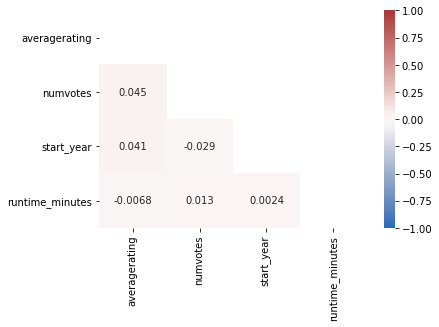

In [316]:
#correlation in the IMDB tables alone
matrix = imdb_joined.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

There sem to not be much correlation in the dataset at this point except FOr the number of votes and year which still seem to be a realy weak corellation 

There are no null values now in our bom dataset and our dataset is now clean.<br>
Lets bring in the bom dataset and clean it up to marge with the IMDB dataset to see how revenue both foreighn and domestic gross capital are influesnced.

In [239]:
#check for null values
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [240]:
#Removing null values from the bom data set to combine it with the joind IMDB data set to see how revenue is affected by movie genres
bom.dropna(inplace=True)

In [241]:
bom.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [242]:
#joining bom data set and the IMDB dataset
omdb_title = imdb_joined
omdb_title['title'] = omdb_title['original_title']
omdb_title=omdb_title.drop(['original_title','primary_title'], axis=1)
bom_joined = pd.merge(bom, omdb_title, on='title', how='inner')
bom_joined.head(3)

,title,studio,domestic_gross,foreign_gross,year,movie_id,averagerating,numvotes,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,8.3,682218,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,8.8,1841066,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,6.3,167532,2010,93.0,"Adventure,Animation,Comedy"


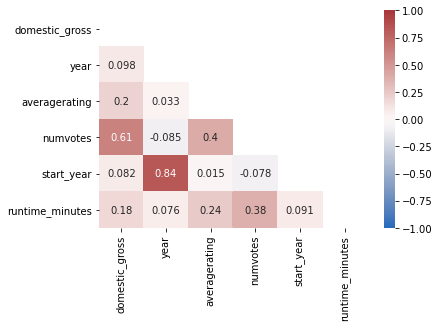

In [313]:
#Crrelation after joining the data
matrix = bom_joined.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

### The correlation between number of votes and year however the correlation between the years dont seem to give us much on the problem we are trying to solve here.

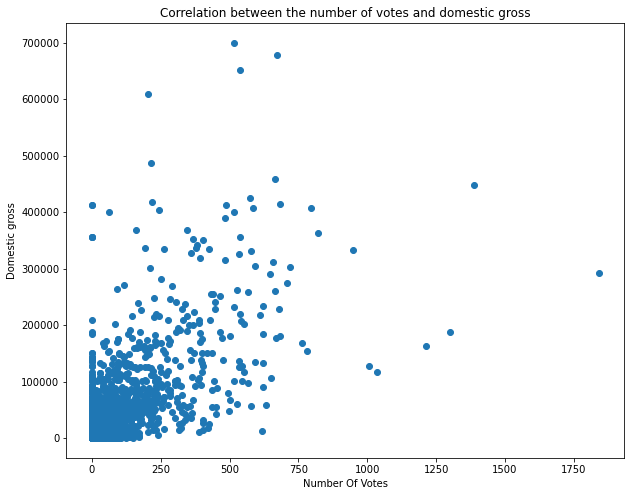

In [319]:
#correlation between the number of votes and the domestic gross mergin
x= bom_joined['numvotes']/1000
y = bom_joined['domestic_gross']/1000
vote_fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x,y)
ax.set_title("Correlation between the number of votes and domestic gross")
ax.set_xlabel("Number Of Votes");
ax.set_ylabel("Domestic gross");


There seem to be a positive correlation between the domestic gros amount and the number of votes<br>
Lets fint out how these two values affect the genres in the data models below

## Data Modeling
The numvotes column in the joined imdb column indicates the number of people who liked a perticular movie meanig if we group the data by genre and sum the number of votes in the numvotes column we can get a scence of the type of movies most people like and dislilke


In [261]:
# lets see how popular movies are grouped by genres
group_by_genre = imdb_joined.groupby('genres').sum()
group_by_genre_sort = group_by_genre.sort_values('numvotes', ascending=False)
group_by_genre_sort



,averagerating,numvotes,start_year,runtime_minutes
genres,,,,
"Action,Adventure,Sci-Fi",718.3,23023248,255849,13718.0
"Action,Adventure,Fantasy",553.3,9658883,207497,11105.0
"Adventure,Animation,Comedy",1412.9,8687435,479535,21061.0
Drama,75411.4,8395521,23389743,1124283.0
"Comedy,Drama,Romance",7601.3,7665463,2432855,120841.0
...,...,...,...,...
"Family,War",5.8,5,2019,91.0
"Music,Mystery",9.0,5,2012,91.0
"Action,Documentary,Horror",6.4,5,2015,74.0


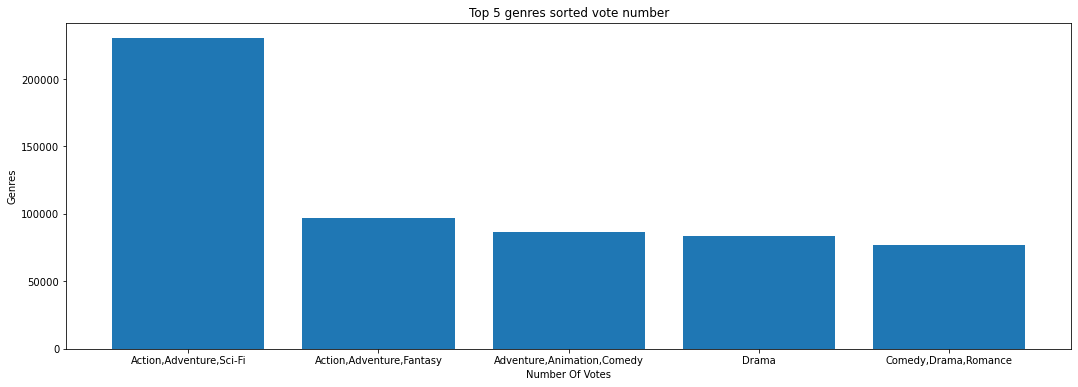

In [306]:
#ploting a horizontal bar graph of the top 5 voted geners genres
x= group_by_genre_sort.index[:5]
y = (group_by_genre_sort['numvotes']/100).head(5)
vote_fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(x,y)
ax.set_title("Top 5 genres sorted vote number")
ax.set_xlabel("Number Of Votes");
ax.set_ylabel("Genres");

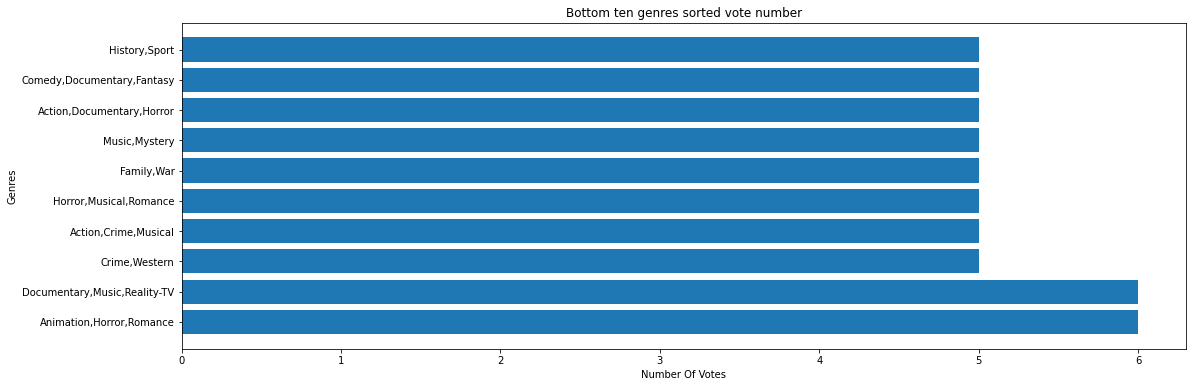

In [302]:
#ploting a horizontal bargraph of the bottom 10 voted geners 
x= group_by_genre_sort.index[-10:]
y = group_by_genre_sort['numvotes'].tail(10)
vote_fig, ax = plt.subplots(figsize=(18, 6))
ax.barh(x,y)
ax.set_title("Bottom ten genres sorted vote number")
ax.set_xlabel("Number Of Votes");
ax.set_ylabel("Genres");

In [245]:
# lets see how geners relate to domestic gross mergins
group_by_genre_bom = bom_joined.groupby('genres').sum()
domestic_gross = group_by_genre_bom.sort_values('domestic_gross', ascending=False)
domestic_gross

,domestic_gross,year,averagerating,numvotes,start_year,runtime_minutes
genres,,,,,,
"Action,Adventure,Sci-Fi",9.934900e+09,86609,290.5,17922785,86605,5593.0
"Adventure,Animation,Comedy",9.564989e+09,132941,426.3,7935746,132940,6234.0
"Action,Adventure,Fantasy",3.758400e+09,58435,182.3,7299692,58432,3389.0
"Action,Adventure,Comedy",3.162300e+09,40316,133.5,5645230,40314,2323.0
Drama,2.382788e+09,179206,578.6,2910995,179211,9129.0
...,...,...,...,...,...,...
"Action,Horror,Mystery",5.500000e+03,2012,5.1,18206,2012,114.0
"Comedy,Crime,Mystery",5.000000e+03,2011,6.4,30352,2011,87.0
"Comedy,Crime,History",4.800000e+03,2011,6.2,18431,2010,91.0


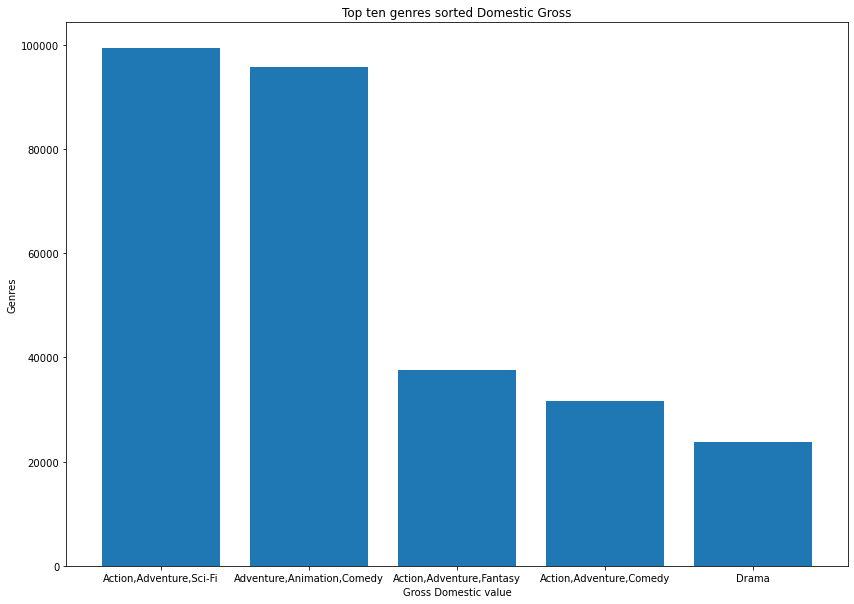

In [295]:
#ploting a lin graph of the top to domestiic gross margin grouuped by genres
x= domestic_gross.index[:5]
y = (domestic_gross['domestic_gross']/100000).head(5)
gross_fig, ax = plt.subplots(figsize=(14, 10))
ax.bar(x,y)
ax.set_title("Top ten genres sorted Domestic Gross")
ax.set_xlabel("Gross Domestic value");
ax.set_ylabel("Genres");

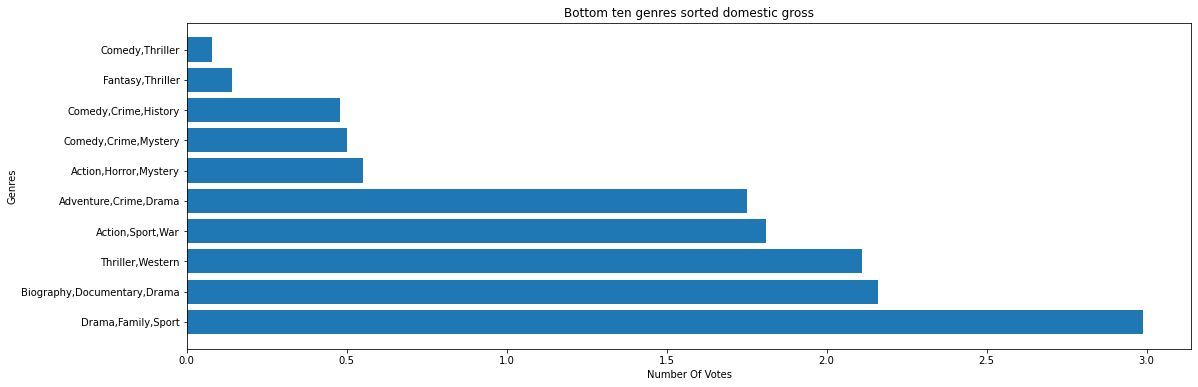

In [288]:
#ploting a horizontal bargraph of the bottom 10 voted geners 
x= domestic_gross.index[-10:]
y = (domestic_gross['domestic_gross']/10000).tail(10)
vote_fig, ax = plt.subplots(figsize=(18, 6))
ax.barh(x,y)
ax.set_title("Bottom ten genres sorted domestic gross")
ax.set_xlabel("Number Of Votes");
ax.set_ylabel("Genres");

## Evaluation
Virtualiozing the films grouped by genre and sorted with the aggrigation of either number of votes or domestic gross value, the genre of movies in the to and bottom are almost the same.
<strong>
There seem to be a strong impact on the type of genre to both the gross margins and the popularity of a given film
    This can help the microsoft team deside which type of movies are suitable to invest in.
</strong>

<br>
Genre therefor plays a very important role in determining the type of film that will have a high profit margin and a positive number of votes from the audience. 

## Conclusions
This analysis led to the following recomendation for the Microsoft studio team

***
Recomendatoions:
* The genre of the movie has a high impact on the success of a film and therefore genres like Action, Adventure, Sci-Fi have a higher chance of performing better than other genres like Comedy, Thrillers

* Domestic gross margins and number of votes can be used as a Metrix for measuring the success of a particular film production!
***
<br>
However the corelation that exist between the two values (number of votes and domestic gross) shoulld not be taken individually as the basic measures of sucess since corelation does not normaly mean coausation. Additional variables need  to be considered to support this argument.
<br>
More movie databases need to be analysed and differnt data sourses and data collection methods should be used to get data and feedback from a larger sample to incease the accuracy of this analysis.
